# Analyzing song survival

In this session, we will analyze songs from the Billboard 100 charts and trace their 'course of life' in the charts.

The data was obtained from [Kaggle](https://www.kaggle.com/datasets/dhruvildave/billboard-the-hot-100-songs), a large community website for data analysis challenges. 

As before, we first import the `pandas` library for data analysis and load the data using the `read_csv` fundtion that takes as its main argument the path to the data file, in our case `charts.csv`. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data/charts.csv")

Inspecting the first 5 lines with the `.head()` method of pandas DataFrames, we obtain an understanding of the structure of the data. 

In [3]:
df.head()

,date,rank,song,artist,last-week,peak-rank,weeks-on-board
0,2021-11-06,1,Easy On Me,Adele,1.0,1,3
1,2021-11-06,2,Stay,The Kid LAROI & Justin Bieber,2.0,1,16
2,2021-11-06,3,Industry Baby,Lil Nas X & Jack Harlow,3.0,1,14
3,2021-11-06,4,Fancy Like,Walker Hayes,4.0,3,19
4,2021-11-06,5,Bad Habits,Ed Sheeran,5.0,2,18


**Think:** What do the columns represent? Provide verbal descriptions of their meaning and write it down.

After this general overview, we might want to achieve a slightly deeper understanding. For instance, it is not difficult to interpret the `date` column, but from only the first few entries, we cannot know the temporal extend of our data. 

Let's find out what the earliest and latest dates are using the `.min()` and `.max()` methods, respectively.

In [5]:
df["date"].min(), df["date"].max()

('1958-08-04', '2021-11-06')

This tells us that the data stored in `charts.csv` runs from August 1958 to November 2021 and thus allows us to trace the movement of songs in the Billboard charts across more than 60 years.

In [6]:
# Top artists
df.artist.value_counts()

artist
Taylor Swift                                                    1023
Elton John                                                       889
Madonna                                                          857
Drake                                                            787
Kenny Chesney                                                    769
                                                                ... 
YoungBoy Never Broke Again Featuring Sherhonda Gaulden             1
Drake Featuring Chris Brown                                        1
Kehlani Featuring Jhene Aiko                                       1
DaBaby Featuring A Boogie Wit da Hoodie & London On Da Track       1
The Shins                                                          1
Name: count, Length: 10205, dtype: int64

In [7]:
# Longest in charts
df.sort_values(by="weeks-on-board", ascending=True).iloc[50_000:]

,date,rank,song,artist,last-week,peak-rank,weeks-on-board
213768,1980-11-22,69,Turn And Walk Away,The Babys,79.0,69,2
106440,2001-06-16,41,Fill Me In,Craig David,69.0,41,2
106443,2001-06-16,44,Bootylicious,Destiny's Child,66.0,44,2
106448,2001-06-16,49,All Or Nothing,O-Town,60.0,49,2
213674,1980-11-29,75,My Mother's Eyes,Bette Midler,85.0,75,2
...,...,...,...,...,...,...,...
39148,2014-05-10,49,Radioactive,Imagine Dragons,48.0,3,87
1215,2021-08-14,16,Blinding Lights,The Weeknd,17.0,1,87
1117,2021-08-21,18,Blinding Lights,The Weeknd,16.0,1,88
1020,2021-08-28,21,Blinding Lights,The Weeknd,18.0,1,89


In [8]:
df["date"] = pd.to_datetime(df["date"])

In [9]:
df[df.artist=="Drake"].song.value_counts()

song
Hotline Bling     36
God's Plan        36
Controlla         26
Fake Love         25
Nice For What     25
                  ..
Trust Issues       1
Too Much           1
Own It             1
Tuscan Leather     1
Come Thru          1
Name: count, Length: 108, dtype: int64

In [10]:
df[df.artist=="Elton John"].song.value_counts()

song
Candle In The Wind 1997/Something About The Way You Look Tonight               42
Can You Feel The Love Tonight (From "The Lion King")                           26
I Guess That's Why They Call It The Blues                                      23
The One                                                                        22
Candle In The Wind                                                             21
Little Jeannie                                                                 21
The Last Song                                                                  20
Recover Your Soul                                                              20
Believe                                                                        20
Circle Of Life (From "The Lion King")                                          20
Blessed                                                                        20
Sad Songs (say So Much)                                                        19
I Don't Wan

In [11]:
def chart_performance(artist, song):
    data = df[(df["artist"] == artist) & (df["song"] == song)]
    data = data.sort_values(by="date").reset_index(drop=True)
    data["date_rel"] = pd.to_timedelta(data["date"] - data["date"][0]).dt.days
    return data

In [12]:
test_cases = {
    "Taylor Swift": "You Belong With Me",
    "Drake": "God's Plan",
    "Elton John": "Candle In The Wind 1997/Something About The Way You Look Tonight",
    "The Weeknd": "Blinding Lights",
    "Elvis Presley": "Please Don't Stop Loving Me"
}

In [13]:
taylor = chart_performance("Taylor Swift", "You Belong With Me")
drake = chart_performance("Drake", "God's Plan")
elton = chart_performance("Elton John", "Candle In The Wind 1997/Something About The Way You Look Tonight")
weeknd = chart_performance("The Weeknd", "Blinding Lights")
elvis = chart_performance("Elvis Presley", "Please Don't Stop Loving Me")

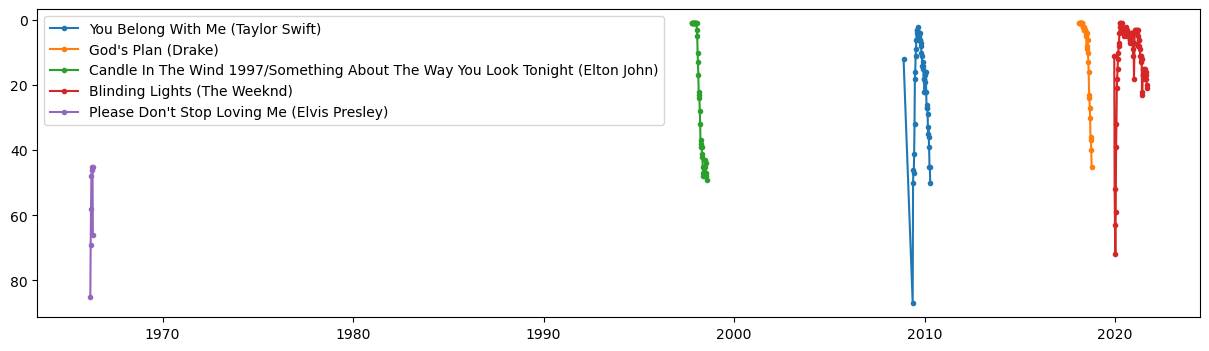

In [43]:
_, ax = plt.subplots(figsize=(15,4))

for artist, song in test_cases.items():
    data = chart_performance(artist, song)
    x = data["date"].values
    y = data["rank"].values

    ax.plot(x, y, marker=".", label=f"{song} ({artist})")

plt.gca().invert_yaxis()
plt.legend()
plt.show()

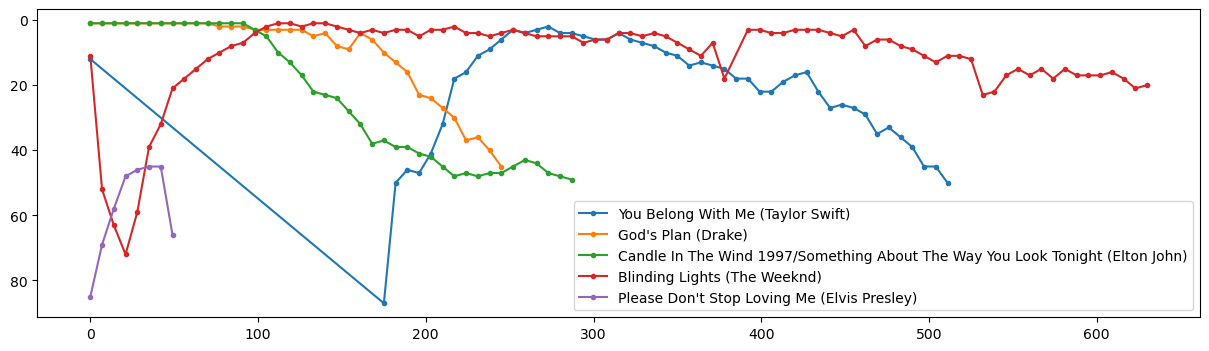

In [44]:
_, ax = plt.subplots(figsize=(15,4))

for artist, song in test_cases.items():
    data = chart_performance(artist, song)
    x = data["date_rel"].values
    y = data["rank"].values

    ax.plot(x, y, marker=".", label=f"{song} ({artist})")

plt.gca().invert_yaxis()
plt.legend()
plt.show()

In [45]:
# TODO: remove lines for missing weeks (gaps in curves)
# add two cases:
#  - short duration but high peak
#  - long duration but low peak

In [46]:
# Q: can we predict a song's survival using the features given in the data?
# --> at least introduce notion of training/test data and discuss the epistemological problem of using 'all' historical 
# sources for explanation

In [47]:
# Try other data: https://www.kaggle.com/datasets/thedevastator/billboard-hot-100-audio-features

In [48]:
df_charts = pd.read_csv("Hot Stuff.csv", index_col=0)
df_charts["WeekID"] = pd.to_datetime(df_charts["WeekID"])

In [49]:
df_charts.head()

,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart
index,,,,,,,,,,
0,http://www.billboard.com/charts/hot-100/1965-0...,1965-07-17,34,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,45.0,34,4
1,http://www.billboard.com/charts/hot-100/1965-0...,1965-07-24,22,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,34.0,22,5
2,http://www.billboard.com/charts/hot-100/1965-0...,1965-07-31,14,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,22.0,14,6
3,http://www.billboard.com/charts/hot-100/1965-0...,1965-08-07,10,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,14.0,10,7
4,http://www.billboard.com/charts/hot-100/1965-0...,1965-08-14,8,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,10.0,8,8


In [50]:
df_audio = pd.read_csv("Hot 100 Audio Features.csv", index_col=0)

In [51]:
df_audio.head()

,SongID,Performer,Song,spotify_genre,spotify_track_id,spotify_track_preview_url,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,danceability,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity
index,,,,,,,,,,,,,,,,,,,,,
0,-twistin'-White Silver SandsBill Black's Combo,Bill Black's Combo,-twistin'-White Silver Sands,[],NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,¿Dònde Està Santa Claus? (Where Is Santa Claus...,Augie Rios,¿Dònde Està Santa Claus? (Where Is Santa Claus?),['novelty'],NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,......And Roses And RosesAndy Williams,Andy Williams,......And Roses And Roses,"['adult standards', 'brill building pop', 'eas...",3tvqPPpXyIgKrm4PR9HCf0,https://p.scdn.co/mp3-preview/cef4883cfd1e0e53...,166106.0,False,The Essential Andy Williams,0.154,...,-14.063,1.0,0.0315,0.91100,0.000267,0.112,0.150,83.969,4.0,38.0
3,...And Then There Were DrumsSandy Nelson,Sandy Nelson,...And Then There Were Drums,"['rock-and-roll', 'space age pop', 'surf music']",1fHHq3qHU8wpRKHzhojZ4a,NaN,172066.0,False,Compelling Percussion,0.588,...,-17.278,0.0,0.0361,0.00256,0.745000,0.145,0.801,121.962,4.0,11.0
4,...Baby One More TimeBritney Spears,Britney Spears,...Baby One More Time,"['dance pop', 'pop', 'post-teen pop']",3MjUtNVVq3C8Fn0MP3zhXa,https://p.scdn.co/mp3-preview/da2134a161f1cb34...,211066.0,False,...Baby One More Time (Digital Deluxe Version),0.759,...,-5.745,0.0,0.0307,0.20200,0.000131,0.443,0.907,92.960,4.0,77.0


In [52]:
d = df_charts.merge(df_audio)

In [53]:
d.shape

(330208, 29)

In [54]:
d["WeekID"] = pd.to_datetime(d["WeekID"])

In [55]:
d.sample(10)

,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity
275610,http://www.billboard.com/charts/hot-100/1964-0...,1964-06-20,85,My Dreams,Brenda Lee,My DreamsBrenda Lee,1,96.0,85,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189145,http://www.billboard.com/charts/hot-100/2014-0...,2014-02-08,97,Radio,Darius Rucker,RadioDarius Rucker,1,71.0,65,15,...,-6.836,1.0,0.0833,0.11900,0.000000,0.0606,0.965,185.939,4.0,48.0
245340,http://www.billboard.com/charts/hot-100/1969-0...,1969-08-02,92,Let's Call It A Day Girl,Bobby Vee,Let's Call It A Day GirlBobby Vee,1,NaN,92,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
141579,http://www.billboard.com/charts/hot-100/2009-0...,2009-08-08,3,Knock You Down,Keri Hilson Featuring Kanye West & Ne-Yo,Knock You DownKeri Hilson Featuring Kanye West...,1,4.0,3,18,...,-4.781,1.0,0.1860,0.01240,0.000000,0.1770,0.671,155.171,4.0,66.0
117570,http://www.billboard.com/charts/hot-100/1960-0...,1960-02-20,93,Sleepy Lagoon,The Platters,Sleepy LagoonThe Platters,1,NaN,93,1,...,-15.519,1.0,0.0302,0.89400,0.002600,0.1160,0.541,68.994,4.0,33.0
150750,http://www.billboard.com/charts/hot-100/1966-0...,1966-09-17,36,Flamingo,Herb Alpert & The Tijuana Brass,FlamingoHerb Alpert & The Tijuana Brass,1,46.0,36,3,...,-9.728,1.0,0.0303,0.52000,0.765000,0.0745,0.877,142.111,4.0,15.0
23582,http://www.billboard.com/charts/hot-100/1985-1...,1985-10-05,63,Soul Kiss,Olivia Newton-John,Soul KissOlivia Newton-John,1,NaN,63,1,...,-15.599,1.0,0.0298,0.00708,0.001260,0.1130,0.830,103.222,4.0,22.0
21493,http://www.billboard.com/charts/hot-100/2003-0...,2003-04-12,21,Rock Your Body,Justin Timberlake,Rock Your BodyJustin Timberlake,1,28.0,21,4,...,-6.055,0.0,0.1400,0.20200,0.000234,0.0521,0.818,100.972,4.0,73.0
71236,http://www.billboard.com/charts/hot-100/2008-1...,2008-12-13,52,My Life,The Game Featuring Lil Wayne,My LifeThe Game Featuring Lil Wayne,1,46.0,21,17,...,-5.093,0.0,0.3560,0.07730,0.000000,0.0877,0.382,148.110,4.0,62.0
208184,http://www.billboard.com/charts/hot-100/1984-1...,1984-12-15,60,Missing You,Diana Ross,Missing YouDiana Ross,1,72.0,60,3,...,-11.410,0.0,0.0366,0.65800,0.001160,0.0485,0.187,86.822,4.0,36.0


In [56]:
## BOOTSTRAP!

# d = d.sample(500_000, replace=True)

In [57]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330208 entries, 0 to 330207
Data columns (total 29 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   url                        330208 non-null  object        
 1   WeekID                     330208 non-null  datetime64[ns]
 2   Week Position              330208 non-null  int64         
 3   Song                       330208 non-null  object        
 4   Performer                  330208 non-null  object        
 5   SongID                     330208 non-null  object        
 6   Instance                   330208 non-null  int64         
 7   Previous Week Position     298048 non-null  float64       
 8   Peak Position              330208 non-null  int64         
 9   Weeks on Chart             330208 non-null  int64         
 10  spotify_genre              315700 non-null  object        
 11  spotify_track_id           287066 non-null  object  

In [58]:
from IPython.display import Audio, HTML

In [59]:
Audio(url=d.loc[1000,"spotify_track_preview_url"])

In [60]:
def curves(performer, song):
    data = d[(d.Performer == performer) & (d.Song == song)].sort_values(by="WeekID").reset_index(drop=True)
    data["date_rel"] = pd.to_timedelta(data["WeekID"] - data["WeekID"][0]).dt.days
    x = data["date_rel"].values # or date_rel or WeekID
    y = data["Week Position"].values
    return x,y

In [61]:
test_cases2 = {
    "Patty Duke": "Don't Just Stand There",
    "Ace Of Base": "Don't Turn Around",
    "Dan + Shay": "Speechless",
    "YoungBloodZ Featuring Lil Jon": "Damn!",
    "K-Ci & JoJo": "All My Life",
    "Trevor Daniel": "Falling"
}

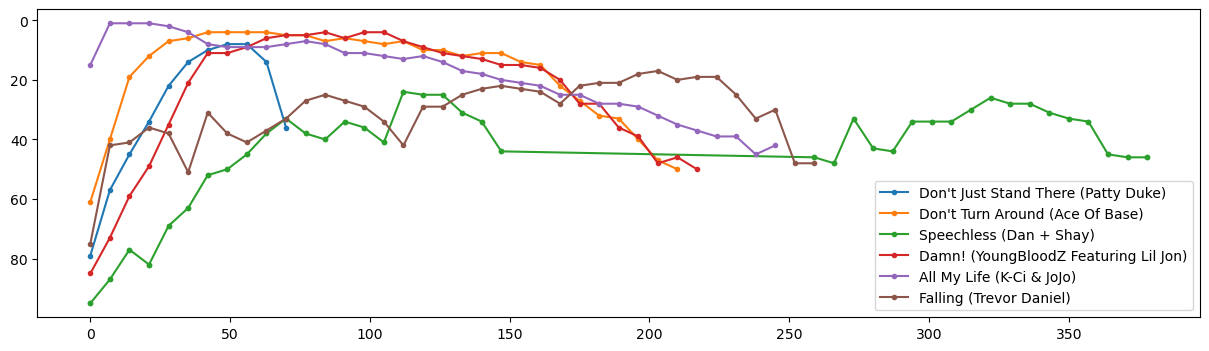

In [62]:
_, ax = plt.subplots(figsize=(15,4))

for performer, song in test_cases2.items():
    x,y = curves(performer, song)
    ax.plot(x, y, marker=".", label=f"{song} ({performer})")

plt.gca().invert_yaxis()
plt.legend()
plt.show()

Modeling the life of a song in the Top 100:

We assume that once a song has left the Top 100, it is impossible to re-enter (even though that does happen, of course)

1. Each song has a starting rank $r_0$.
2. For each following week, there is a bernoulli dropout probability $\theta$ that determines whether a song remains in the charts.
3. 

In [63]:
# Observation: Genres tend to leave the Top 100 higher than they entered them

In [64]:
entrances = []
peaks = []
exits = []

for _, group in d.groupby("SongID"):
    weeks = group.sort_values(by="WeekID")["Week Position"].values
    entrances.append(weeks[0])
    peaks.append(weeks.min())
    exits.append(weeks[-1])

In [65]:
import numpy as np

In [66]:
# from matplotlib.collections import LineCollection

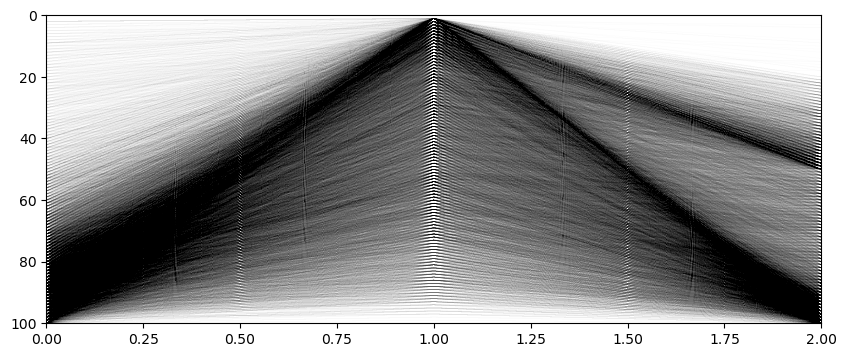

In [67]:
_, ax = plt.subplots(figsize=(10,4))

K = len(entrances) + 1

for a, b, c in zip(entrances[:K], peaks[:K], exits[:K]):
    if a != b != c: # remove constants
        ax.plot([0, 1, 2], [a, b, c], c="k", lw=.5, alpha=.01)

plt.xlim(0,2)
plt.ylim(0,100)
plt.gca().invert_yaxis() # smaller is better
plt.savefig("img/rise-decline.png", dpi=600)
plt.show()

**OBSERVATION**: At least 3 types:

- constants
- low in, peak, low out
- low in, peak, mid out

Try to disentangle what causes the difference